In [2]:
!pip install arch

In [3]:
!pip install pmdarima

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 614.7/614.7 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 2.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 2.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 2.7 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -

In [4]:
!pip install pymannkendall

In [8]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ----------------------------

In [10]:
!pip install seaborn

In [11]:
!pip install pymannkendall

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, month_plot
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR, VECM
from statsmodels.tsa.vector_ar import irf
from arch.unitroot import ADF,KPSS
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

In [13]:
import os
for dirname, _, filenames in os.walk(r"E:\MajorProject\Data\Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\MajorProject\Data\Dataset\ADA-USD.csv
E:\MajorProject\Data\Dataset\BNB-USD.csv
E:\MajorProject\Data\Dataset\BTC-USD.csv
E:\MajorProject\Data\Dataset\DOGE-USD.csv
E:\MajorProject\Data\Dataset\DOT1-USD.csv
E:\MajorProject\Data\Dataset\ETH-USD.csv
E:\MajorProject\Data\Dataset\HEX-USD.csv
E:\MajorProject\Data\Dataset\SOL1-USD.csv
E:\MajorProject\Data\Dataset\USDC-USD.csv
E:\MajorProject\Data\Dataset\USDT-USD.csv
E:\MajorProject\Data\Dataset\XRP-USD.csv


In [15]:
date=pd.to_datetime(pd.read_csv(r"E:\MajorProject\Data\Dataset\BTC-USD.csv")["Date"])

btc=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\BTC-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"BTC"})
eth=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\ETH-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"ETH"})
sol=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\SOL1-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"SOL"})
hexusd=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\HEX-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"HEX"})
xrp=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\XRP-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"XRP"})
dot1=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\DOT1-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"DOT1"})
bnb=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\BNB-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"BNB"})
ada=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\USDT-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"ADA"})
usdt=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\USDT-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"USDT"})
usdc=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\USDC-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"USDC"})
doge=pd.DataFrame(pd.read_csv(r"E:\MajorProject\Data\Dataset\DOGE-USD.csv")["Adj Close"]).rename(columns={"Adj Close":"DOGE"})

data=pd.concat([doge,hexusd,sol,xrp,dot1,eth,bnb,ada,usdt,usdc,btc],axis=1)
data["Date"]=date
data.set_index("Date",inplace=True)
data.head()

,DOGE,HEX,SOL,XRP,DOT1,ETH,BNB,ADA,USDT,USDC,BTC
Date,,,,,,,,,,,
2015-09-13,0.000126,0.003790,2.915519,0.008532,4.174463,0.936003,0.937204,1.0,1.0,0.998835,230.511993
2015-09-14,0.000125,0.003443,2.846996,0.007404,4.027708,0.875622,0.678784,1.0,1.0,0.999346,230.643997
2015-09-15,0.000126,0.003618,3.151377,0.007720,4.382961,0.944410,0.799709,1.0,1.0,1.003387,230.304001
2015-09-16,0.000124,0.003753,3.191359,0.007426,4.423528,0.907175,0.804198,1.0,1.0,0.999926,229.091003
2015-09-17,0.000125,0.004019,3.139166,0.007372,4.334268,0.874231,0.789589,1.0,1.0,1.003121,229.809998


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2193 entries, 2015-09-13 to 2021-09-13
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DOGE    2189 non-null   float64
 1   HEX     196 non-null    float64
 2   SOL     351 non-null    float64
 3   XRP     2189 non-null   float64
 4   DOT1    351 non-null    float64
 5   ETH     2189 non-null   float64
 6   BNB     1458 non-null   float64
 7   ADA     2189 non-null   float64
 8   USDT    2189 non-null   float64
 9   USDC    670 non-null    float64
 10  BTC     2189 non-null   float64
dtypes: float64(11)
memory usage: 205.6 KB


In [17]:
print(data.isnull().sum())

DOGE       4
HEX     1997
SOL     1842
XRP        4
DOT1    1842
ETH        4
BNB      735
ADA        4
USDT       4
USDC    1523
BTC        4
dtype: int64


In [18]:
data.drop(data.isnull().sum()[data.isnull().sum()>4].index,axis=1,inplace=True)
data.head()

,DOGE,XRP,ETH,ADA,USDT,BTC
Date,,,,,,
2015-09-13,0.000126,0.008532,0.936003,1.0,1.0,230.511993
2015-09-14,0.000125,0.007404,0.875622,1.0,1.0,230.643997
2015-09-15,0.000126,0.007720,0.944410,1.0,1.0,230.304001
2015-09-16,0.000124,0.007426,0.907175,1.0,1.0,229.091003
2015-09-17,0.000125,0.007372,0.874231,1.0,1.0,229.809998


In [19]:
# Fill in missing observations

for i in data.columns.to_list():
    data[i]=data[i].fillna(method="ffill")

data.isnull().sum()

DOGE    0
XRP     0
ETH     0
ADA     0
USDT    0
BTC     0
dtype: int64

In [20]:
data.tail()

,DOGE,XRP,ETH,ADA,USDT,BTC
Date,,,,,,
2021-09-09,0.252596,1.089401,3427.340088,1.000146,1.000146,46391.421875
2021-09-10,0.239982,1.057267,3211.505859,1.000320,1.000320,44883.910156
2021-09-11,0.241432,1.079906,3270.278076,1.000979,1.000979,45201.457031
2021-09-12,0.250617,1.119636,3410.134521,0.999698,0.999698,46063.269531
2021-09-13,0.235368,1.055947,3223.280518,1.000469,1.000469,44743.929688


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DOGE,2193.0,0.024948,0.080713,0.000114,0.000304,0.002463,0.003424,0.684777
XRP,2193.0,0.334811,0.374724,0.004090,0.008835,0.255933,0.438741,3.377810
ETH,2193.0,467.267347,740.021513,0.434829,28.654600,209.703995,433.354919,4168.701172
ADA,2193.0,1.001014,0.008664,0.913595,1.000000,1.000223,1.002509,1.077880
USDT,2193.0,1.001014,0.008664,0.913595,1.000000,1.000223,1.002509,1.077880
BTC,2193.0,10330.097629,13628.494266,227.085007,1143.810059,6716.440430,10256.058594,63503.457031


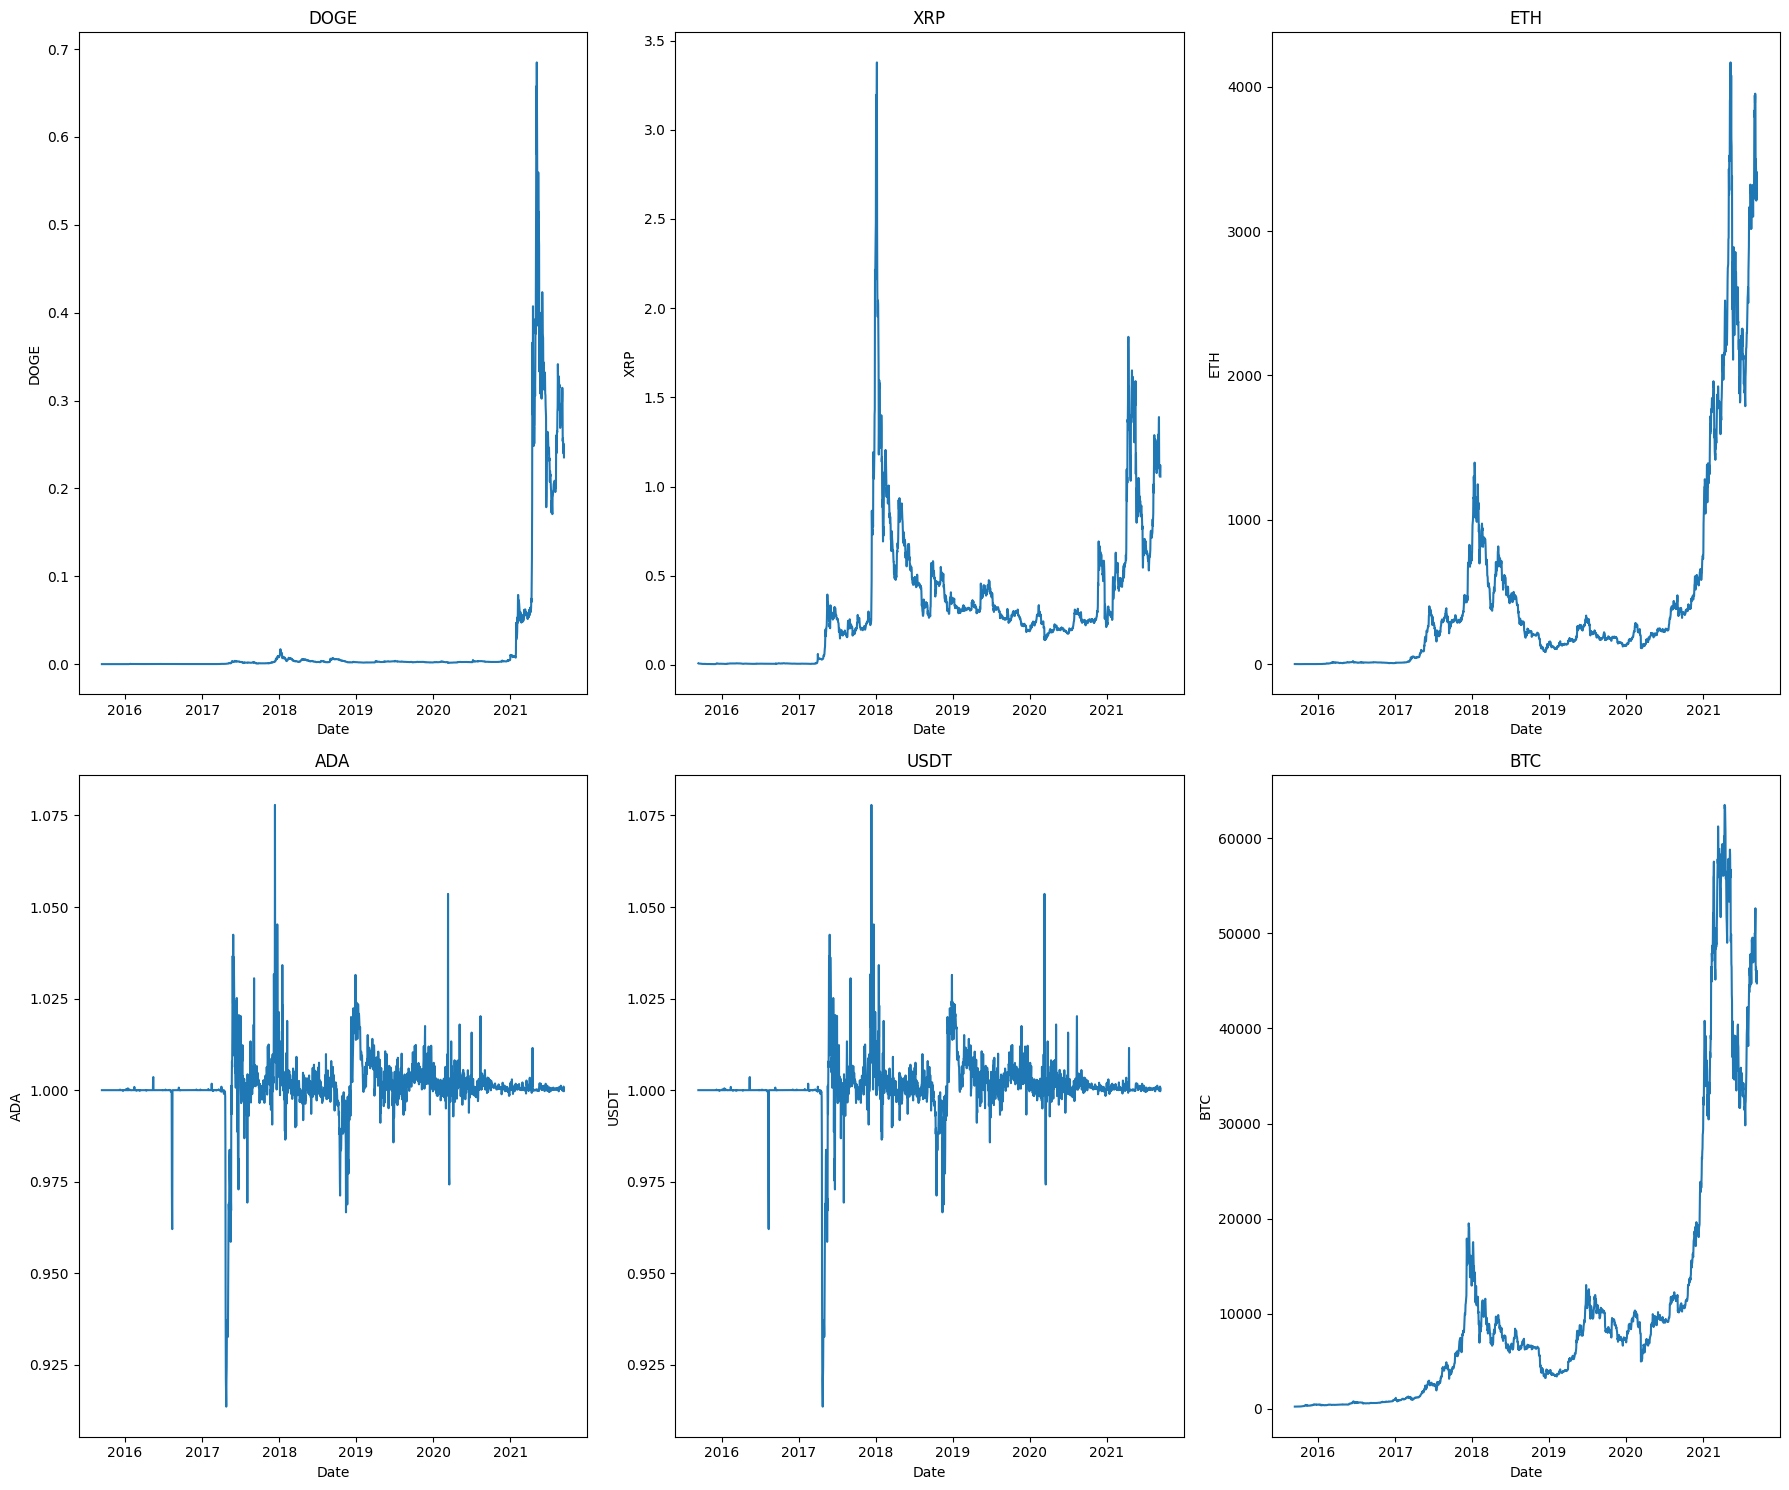

In [22]:
fig,axes=plt.subplots(round(len(data.columns.to_list()) / 3), 3, figsize=(18,15))

for i,ax in enumerate(fig.axes):
    if i<(len(data.columns.to_list())):
        sns.lineplot(x=data.index, y = data.columns.to_list()[i], data=data, ax=ax)
        ax.set_title(data.columns.to_list()[i])
fig.tight_layout()

In [23]:
data_copy=data.copy()

In [24]:
for i in data.columns.to_list():
    s=seasonal_decompose(data[i])
    trend=s.trend
    mkt=mk.original_test(trend)
    
    print("{} trend test:\n{}".format(i,mkt))
    print("------------------------------------------------")


DOGE trend test:
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=39.79813493253875, Tau=0.5677991592170486, s=1357262.0, var_s=1163057804.6666667, slope=2.1447327289778056e-06, intercept=0.00012308721475461082)
------------------------------------------------
XRP trend test:
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=29.95372652146616, Tau=0.42734933322623786, s=1021532.0, var_s=1163058020.0, slope=0.00020194993678887484, intercept=0.03720686927939318)
------------------------------------------------
ETH trend test:
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=38.77469198530907, Tau=0.5531977822875003, s=1322359.0, var_s=1163058021.0, slope=0.23295426342035785, intercept=-46.75687242299793)
------------------------------------------------
ADA trend test:
Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=12.452684185316642, Tau=0.17757973486345957, s=424485.0, var_s=1161974780.3333333, slope=3.133762788940756e-07, intercept=1.0000589681697605)
---------

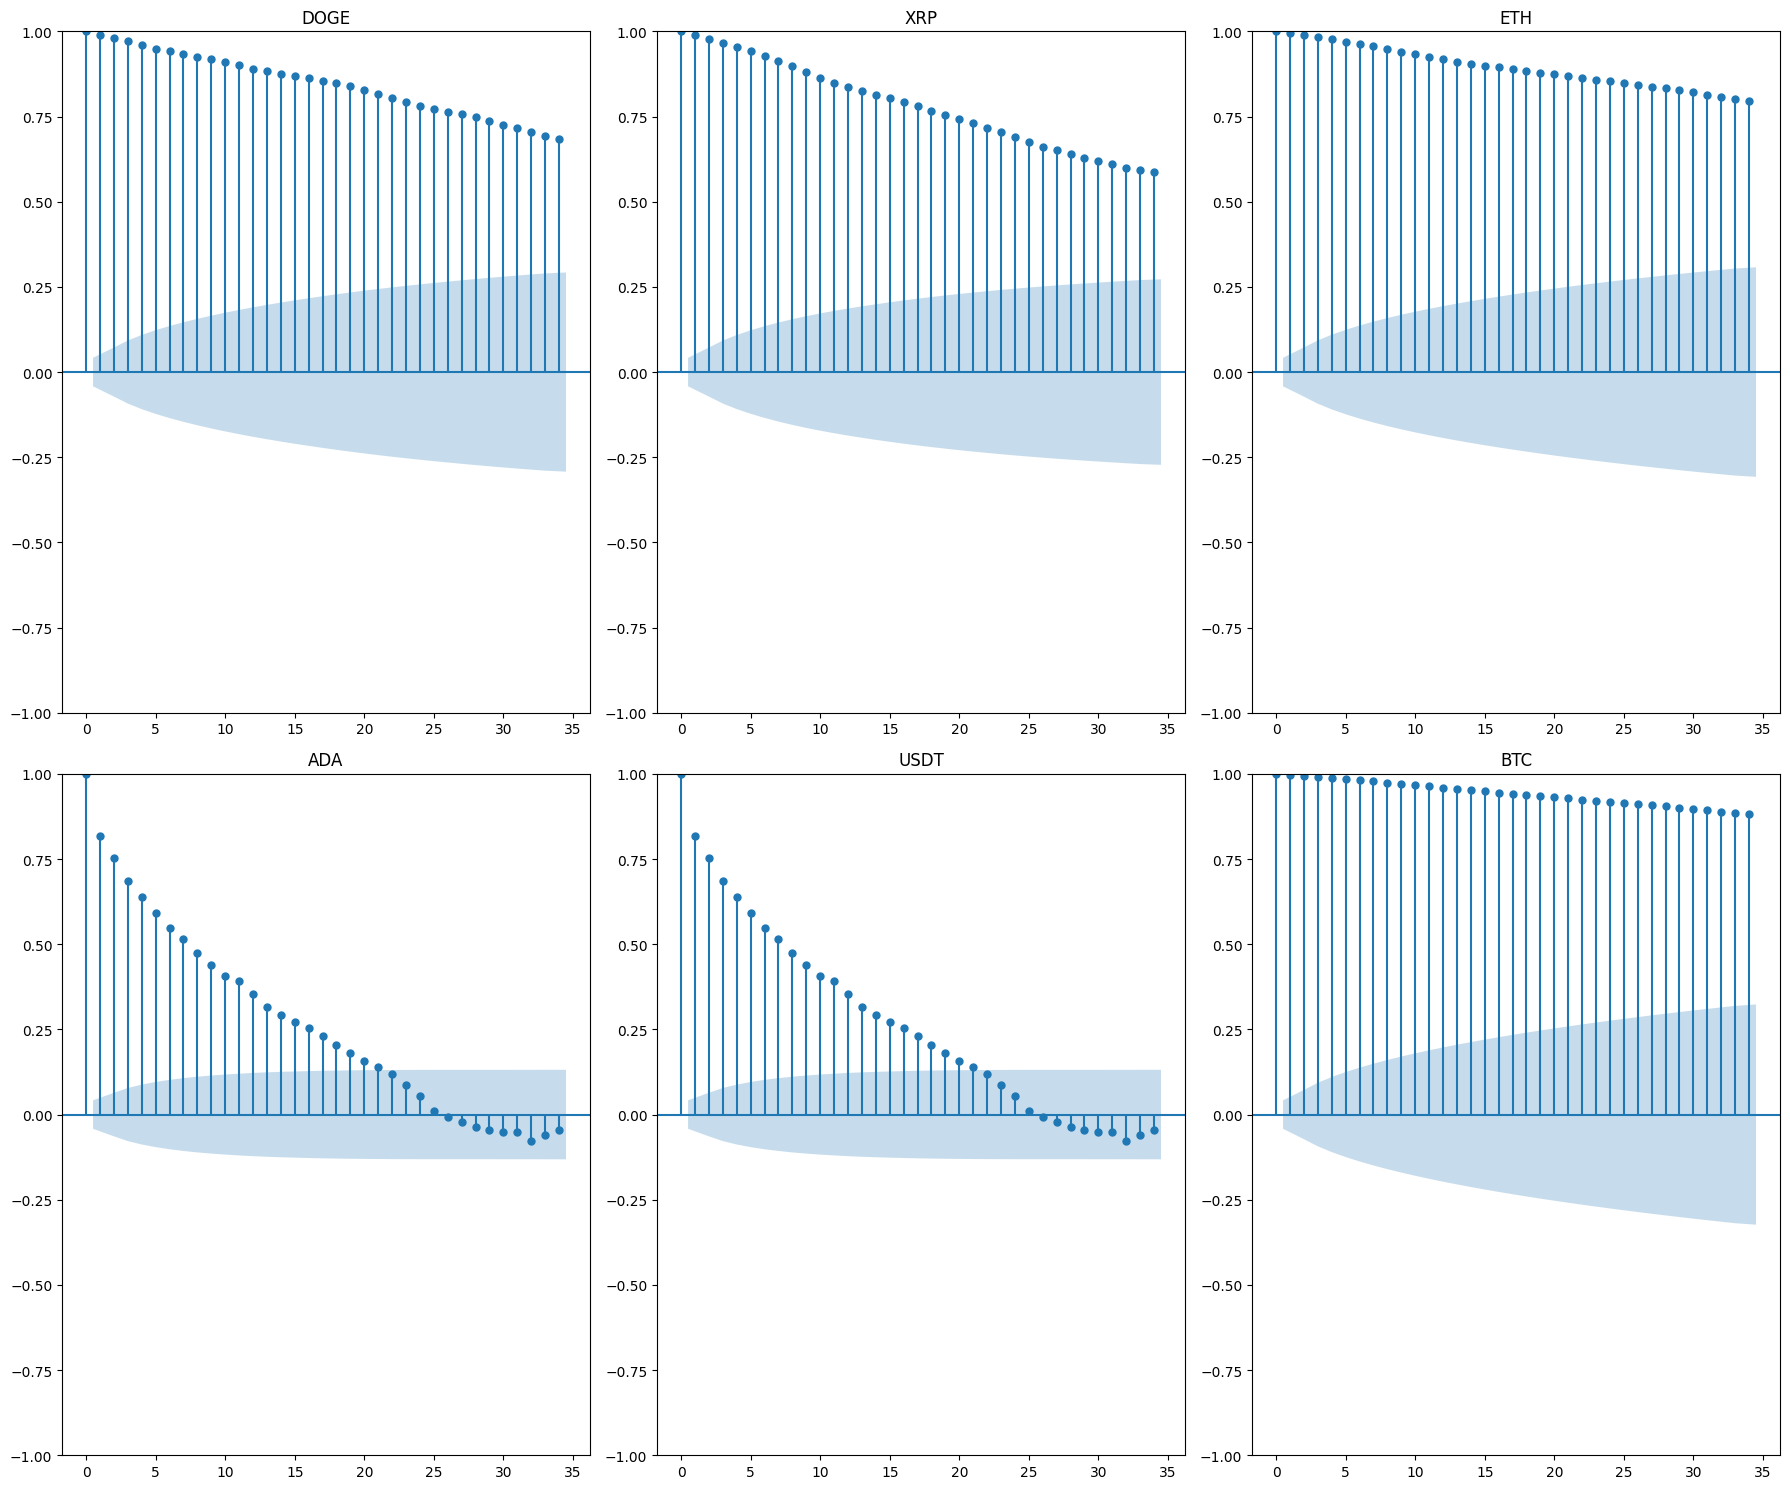

In [25]:
fig,axes=plt.subplots(round(len(data.columns.to_list()) / 3), 3, figsize=(18,15))

for i,ax in enumerate(fig.axes):
    if i<(len(data.columns.to_list())):
        plot_acf(data[data.columns.to_list()[i]], ax=ax)
        ax.set_title(data.columns.to_list()[i])
fig.tight_layout()

In [26]:
for i in data.columns.to_list():
    adf=ADF(data[i],trend="ct")
    print("Unit root test for {}:\n".format(i))
    print(adf)
    #print(adf.regression.summary())
    print("**************************************")

Unit root test for DOGE:

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.694
P-value                         0.239
Lags                               26
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
**************************************
Unit root test for XRP:

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.825
P-value                         0.015
Lags                               26
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
**************************************
Unit root test for ETH:

   Augmented Dickey-Fuller Results   
Test Statistic            

In [27]:
for i in data.columns.to_list():
    kpss=KPSS(data[i],trend="ct")
    print("Unit root test for {}:\n".format(i))
    print(kpss)
    print("******************************")

Unit root test for DOGE:

    KPSS Stationarity Test Results   
Test Statistic                  0.653
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
******************************
Unit root test for XRP:

    KPSS Stationarity Test Results   
Test Statistic                  0.415
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
******************************
Unit root test for ETH:

    KPSS Stationarity Test Results   
Test Statistic                  0.800
P-value   

In [28]:
data2=data[["DOGE","ETH","BTC"]]
data2.head()

,DOGE,ETH,BTC
Date,,,
2015-09-13,0.000126,0.936003,230.511993
2015-09-14,0.000125,0.875622,230.643997
2015-09-15,0.000126,0.944410,230.304001
2015-09-16,0.000124,0.907175,229.091003
2015-09-17,0.000125,0.874231,229.809998


In [29]:
for i in data2.columns.to_list():
    adf=ADF(data2[i],trend="ct")
    print("Unit root test for {}:\n".format(i))
    print(adf)
    print(adf.regression.summary())
    print("------------------")

Unit root test for DOGE:

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.694
P-value                         0.239
Lags                               26
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     23.86
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          2.05e-105
Time:                        16:39:58   Log-Likelihood:                 7043.1
No. Observations:                2166   AIC:                        -1.403e+04
Df Residuals:                 

In [30]:
for i in data2.columns:
    dif=data2[i].diff().dropna()
    adf=ADF(dif,trend="ct")
    print(adf)
    print("***********************************")

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.614
P-value                         0.000
Lags                               26
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
***********************************
   Augmented Dickey-Fuller Results   
Test Statistic                 -9.817
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
***********************************
   Augmented Dickey-Fuller Results   
Test Statistic                 -8.148
P-value                         0.000
Lags                            

In [31]:
model_var=VAR(data2)
lags=model_var.select_order(maxlags=8)
print(lags.summary()) 
print(lags.selected_orders)

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       23.81       23.82   2.194e+10       23.81
1       11.21       11.24   7.370e+04       11.22
2       11.16       11.21   7.000e+04       11.18
3       11.12       11.19   6.724e+04       11.14
4       11.09       11.19   6.555e+04       11.13
5       11.06       11.19   6.382e+04       11.11
6       10.97       11.12   5.835e+04       11.03
7       10.91       11.09   5.496e+04       10.98
8      10.87*      11.07*  5.256e+04*      10.94*
-------------------------------------------------
{'aic': 8, 'bic': 8, 'hqic': 8, 'fpe': 8}


In [32]:
j_test=coint_johansen(data2,det_order=0,k_ar_diff=8)

con=pd.DataFrame()
con["Trace Statistic"]=j_test.lr1
con["Trace Statistic Critic"]=j_test.cvt[1] # 95% confidence level
con["Eigen Statistic"]=j_test.lr2
con["Eigen Statistic Critic"]=j_test.cvm[1] # 95% confidence level

con

,Trace Statistic,Trace Statistic Critic,Eigen Statistic,Eigen Statistic Critic
0,65.472319,13.4294,40.791363,12.2971
1,24.680957,15.4943,24.447715,14.2639
2,0.233242,19.9349,0.233242,18.5200


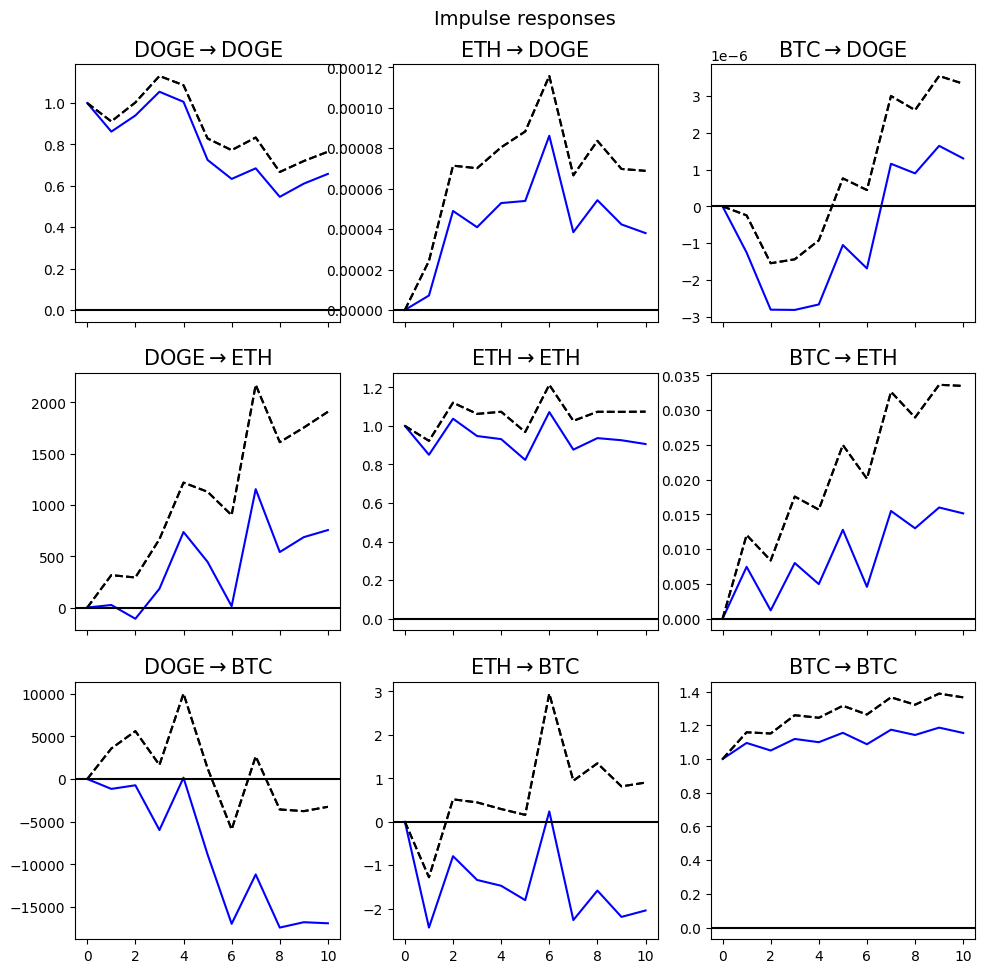

In [33]:
model_var=VAR(data2).fit(maxlags=8)

et=irf.IRAnalysis(model=model_var,periods=10)
et.plot(subplot_params={"fontsize":15},signif=0.01,stderr_type="mc",repl=100)
plt.show()

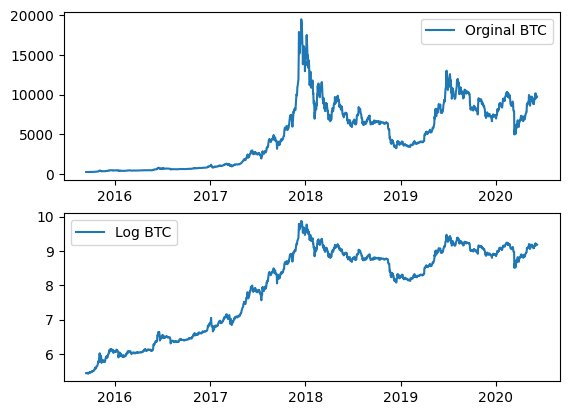

In [34]:
# We do not want the model to see the last month's values.
data_front=data2[:-30]
data_end=data2[-30:]

# Train - Test Split
train_size=int(len(data_front)*0.8)
data_train, data_test=data_front.iloc[:train_size],data_front.iloc[train_size:]

# Let's apply logarithmic transformation

data_front_log=pd.DataFrame(boxcox(data_front,lmbda=0),columns=["DOGE_LOG","ETH_LOG","BTC_LOG"], index=data_front.index)
data_end_log=pd.DataFrame(boxcox(data_end,lmbda=0),columns=["DOGE_LOG","ETH_LOG","BTC_LOG"], index=data_end.index)

data_front=pd.concat([data_front,data_front_log],axis=1)
data_end=pd.concat([data_end,data_end_log],axis=1)

# Logarithmic transformation for training and test set

data_train_log=pd.DataFrame(boxcox(data_train,lmbda=0),columns=["DOGE_LOG","ETH_LOG","BTC_LOG"], index=data_train.index)
data_test_log=pd.DataFrame(boxcox(data_test,lmbda=0),columns=["DOGE_LOG","ETH_LOG","BTC_LOG"], index=data_test.index)

data_train=pd.concat([data_train,data_train_log],axis=1)
data_test=pd.concat([data_test,data_test_log],axis=1)



# Let's visualize time series
fig, axs = plt.subplots(2,1)
axs[0].plot(data_train["BTC"], label="Orginal BTC")
axs[0].legend()
axs[1].plot(data_train["BTC_LOG"], label="Log BTC")
axs[1].legend()
plt.show()

In [35]:
tscv=TimeSeriesSplit(n_splits=5)

def error(y,pred):
    mse=mean_squared_error(y,pred)
    rmse=np.sqrt(mean_squared_error(y,pred))
    mae=mean_absolute_error(y,pred)
    return mse,rmse,mae

In [36]:
mse=[]
rmse=[]
mae=[]

for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    model=Holt(train).fit(optimized=True, use_brute=True)
    pred_log=model.forecast(len(test))
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("Holt Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))
df1 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df1=df1._append({"Models":"Holt Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df1

Holt Model MSE: 135020291.65231127 RMSE: 8757.441818740826 MAE 7052.953774257231


,Models,MSE,RMSE,MAE
0,Holt Model,1.350203e+08,8757.441819,7052.953774


In [37]:
mse=[]
rmse=[]
mae=[]

for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    model=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=30).fit(optimized=True,use_brute=True)
    pred_log=model.forecast(len(test))
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("Holt Winters Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))
df2 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df2=df2._append({"Models":"Holt Winters Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df2

Holt Winters Model MSE: 120127218.37801893 RMSE: 8717.582190864421 MAE 7061.68279015838


,Models,MSE,RMSE,MAE
0,Holt Winters Model,1.201272e+08,8717.582191,7061.68279


In [38]:
# ARIMA

mse=[]
rmse=[]
mae=[]

for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    model=auto_arima(train,trace=False,seasonal=False)
    pred_log=model.predict(len(test))
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
print("ARIMA Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))

df3 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df3=df3._append({"Models":"ARIMA Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df3

ARIMA Model MSE: 121395210.17763376 RMSE: 8788.399920673943 MAE 7129.276226749787


,Models,MSE,RMSE,MAE
0,ARIMA Model,1.213952e+08,8788.399921,7129.276227


In [39]:
# SARIMA Model

mse=[]
rmse=[]
mae=[]

for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    model=auto_arima(train,trace=False,seasonal=True,m=30)
    pred_log=model.predict(len(test))
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("SARIMA Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))
df4 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df4=df4._append({"Models":"SARIMA Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df4

SARIMA Model MSE: 121395210.17763376 RMSE: 8788.399920673943 MAE 7129.276226749787


,Models,MSE,RMSE,MAE
0,SARIMA Model,1.213952e+08,8788.399921,7129.276227


In [40]:
# ARIMAX MODEL 1 - Independent variable : DOGE_LOG
for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    trainexog, testexog=data_front["DOGE_LOG"].iloc[train_index], data_front["DOGE_LOG"].iloc[test_index]
    trainexog=np.array(trainexog).reshape(-1,1)
    testexog=np.array(testexog).reshape(-1,1)
    model=auto_arima(train,trace=False,seasonal=False,X=trainexog)
    pred_log=model.predict(len(test),X=testexog)
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("ARIMAX 1 Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))
df5 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df5=df5._append({"Models":"ARIMAX 1 Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df5

ARIMAX 1 Model MSE: 135879053.3937587 RMSE: 8564.122414197967 MAE 6784.402947095145


,Models,MSE,RMSE,MAE
0,ARIMAX 1 Model,1.358791e+08,8564.122414,6784.402947


In [41]:
# ARIMAX MODEL 2 - Independent variable : ETH_LOG
for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    trainexog, testexog=data_front["ETH_LOG"].iloc[train_index], data_front["ETH_LOG"].iloc[test_index]
    trainexog=np.array(trainexog).reshape(-1,1)
    testexog=np.array(testexog).reshape(-1,1)
    model=auto_arima(train,trace=False,seasonal=False,X=trainexog)
    pred_log=model.predict(len(test),X=testexog)
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("ARIMAX 2 Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))
df6 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df6=df6._append({"Models":"ARIMAX 2 Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df6

ARIMAX 2 Model MSE: 122188580.34226628 RMSE: 8012.659558561734 MAE 6371.202404535305


,Models,MSE,RMSE,MAE
0,ARIMAX 2 Model,1.221886e+08,8012.659559,6371.202405


In [42]:
# SARIMAX MODEL 1 - Independent variable : DOGE_LOG
for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    trainexog, testexog=data_front["DOGE_LOG"].iloc[train_index], data_front["DOGE_LOG"].iloc[test_index]
    trainexog=np.array(trainexog).reshape(-1,1)
    testexog=np.array(testexog).reshape(-1,1)
    model=auto_arima(train,trace=False,seasonal=True,m=30,X=trainexog)
    pred_log=model.predict(len(test),X=testexog)
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("SARIMAX 1 Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))

df7 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df7=df7._append({"Models":"SARIMAX 1 Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df7

SARIMAX 1 Model MSE: 129232159.40917063 RMSE: 8094.4558958518 MAE 6388.284220261606


,Models,MSE,RMSE,MAE
0,SARIMAX 1 Model,1.292322e+08,8094.455896,6388.28422


In [43]:
# SARIMAX MODEL 2 - Independent variable : ETH_LOG
for train_index,test_index in tscv.split(data_front["BTC_LOG"]):
    train,test = data_front["BTC_LOG"].iloc[train_index], data_front["BTC_LOG"].iloc[test_index]
    trainexog, testexog=data_front["ETH_LOG"].iloc[train_index], data_front["ETH_LOG"].iloc[test_index]
    trainexog=np.array(trainexog).reshape(-1,1)
    testexog=np.array(testexog).reshape(-1,1)
    model=auto_arima(train,trace=False,seasonal=True,m=30,X=trainexog)
    pred_log=model.predict(len(test),X=testexog)
    pred=inv_boxcox(pred_log,0) # inverse transformation
    test_inv=inv_boxcox(test,0) # inverse transformation
    errorend=error(test_inv,pred)
    mse.append(errorend[0])
    rmse.append(errorend[1])
    mae.append(errorend[2])
    
print("SARIMAX 2 Model MSE: {} RMSE: {} MAE {}".format(np.mean(mse),np.mean(rmse),np.mean(mae)))

df8 = pd.DataFrame(columns=["Models","MSE","RMSE","MAE"])
df8=df8._append({"Models":"SARIMAX 2 Model","MSE":np.mean(mse),"RMSE":np.mean(rmse),"MAE":np.mean(mae)},ignore_index=True)
df8

SARIMAX 2 Model MSE: 122347254.37519278 RMSE: 7857.511486139294 MAE 6219.587640092409


,Models,MSE,RMSE,MAE
0,SARIMAX 2 Model,1.223473e+08,7857.511486,6219.58764


In [44]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0)
df=df.sort_values(by="RMSE",ascending=True).reset_index(drop=True)
df

,Models,MSE,RMSE,MAE
0,SARIMAX 2 Model,1.223473e+08,7857.511486,6219.587640
1,ARIMAX 2 Model,1.221886e+08,8012.659559,6371.202405
2,SARIMAX 1 Model,1.292322e+08,8094.455896,6388.284220
3,ARIMAX 1 Model,1.358791e+08,8564.122414,6784.402947
4,Holt Winters Model,1.201272e+08,8717.582191,7061.682790
5,Holt Model,1.350203e+08,8757.441819,7052.953774
6,ARIMA Model,1.213952e+08,8788.399921,7129.276227
7,SARIMA Model,1.213952e+08,8788.399921,7129.276227


In [47]:
# Let's obtain the aic values for the SARIMAX 2 model at different seasonal period values.

for i in [10,15,20,25,30]:
    smodel=auto_arima(data_train["BTC_LOG"],trace=False,seasonal=True,m=i,X=np.array(data_train["ETH_LOG"]).reshape(-1,1))
    print("m {} -> aic {}".format(i,smodel.aic()))

m 10 -> aic -6750.965395524206
m 15 -> aic -6746.598498893775
m 20 -> aic -6749.053457280646
m 25 -> aic -6746.598498893775
m 30 -> aic -6746.598498893775


In [48]:
model1=auto_arima(data_train["BTC_LOG"], trace=False, seasonal=False, X=np.array(data_train["ETH_LOG"]).reshape(-1,1))
model2=auto_arima(data_train["BTC_LOG"], trace=False, seasonal=True, m=10, X=np.array(data_train["ETH_LOG"]).reshape(-1,1))

print(model1.aic())
print(model2.aic())

-6746.598498893775
-6750.965395524206


In [49]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1730
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3376.299
Date:                Wed, 22 Jan 2025   AIC                          -6746.598
Time:                        17:05:08   BIC                          -6730.233
Sample:                    09-13-2015   HQIC                         -6740.545
                         - 06-07-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3472      0.006     59.422      0.000       0.336       0.359
ma.L1          0.0420      0.015      2.739      0.006       0.012       0.072
sigma2         0.0012   2.14e-05     54.963      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2865.03
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1730
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 10)   Log Likelihood                3380.483
Date:                             Wed, 22 Jan 2025   AIC                          -6750.965
Time:                                     17:06:06   BIC                          -6723.689
Sample:                                 09-13-2015   HQIC                         -6740.876
                                      - 06-07-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3468      0.006     59.817      0.000       0.335       0.358
ma.L1          0.0404      0.015      2.621      0.009       0.010       0.071
ar.S.L10       0.0489      0.021      2.382      0.017       0.009       0.089
ar.S.L20       0.0470      0.020      2.367      0.018       0.008       0.086
sigma2         0.0012   2.15e-05     54.644      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2842.64
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
q1=acorr_ljungbox(model1.resid())
q2=acorr_ljungbox(model2.resid())

print(q1)
print("------------")
print(q2)

     lb_stat  lb_pvalue
1   0.025825   0.872328
2   0.071250   0.965002
3   0.097394   0.992148
4   0.099682   0.998798
5   0.115361   0.999769
6   0.126393   0.999960
7   0.172753   0.999985
8   0.174472   0.999998
9   0.195010   1.000000
10  0.212784   1.000000
------------
     lb_stat  lb_pvalue
1   0.025972   0.871970
2   0.069878   0.965664
3   0.097311   0.992158
4   0.099309   0.998807
5   0.114594   0.999773
6   0.124955   0.999961
7   0.174161   0.999984
8   0.175457   0.999998
9   0.193705   1.000000
10  0.193726   1.000000


In [52]:
m1_log_pred=model1.fittedvalues()
m1_log_pred2=model1.predict(len(data_test),X=np.array(data_test["ETH_LOG"]).reshape(-1,1))
m1_log_pred3=model1.predict(len(data_end),X=np.array(data_end["ETH_LOG"]).reshape(-1,1))

m1_pred=inv_boxcox(m1_log_pred,0)
m1_pred2=inv_boxcox(m1_log_pred2,0)
m1_pred3=inv_boxcox(m1_log_pred3,0)


m2_log_pred=model2.fittedvalues()
m2_log_pred2=model2.predict(len(data_test),X=np.array(data_test["ETH_LOG"]).reshape(-1,1))
m2_log_pred3=model2.predict(len(data_end),X=np.array(data_end["ETH_LOG"]).reshape(-1,1))

m2_pred=inv_boxcox(m2_log_pred,0)
m2_pred2=inv_boxcox(m2_log_pred2,0)
m2_pred3=inv_boxcox(m2_log_pred3,0)

In [53]:
data_train["BTC_predicted_arimax"]=m1_pred
data_train["BTC_predicted_sarimax"]=m2_pred
data_train.head()

,DOGE,ETH,BTC,DOGE_LOG,ETH_LOG,BTC_LOG,BTC_predicted_arimax,BTC_predicted_sarimax
Date,,,,,,,,
2015-09-13,0.000126,0.936003,230.511993,-8.979229,-0.066137,5.440303,0.977296,0.977327
2015-09-14,0.000125,0.875622,230.643997,-8.987197,-0.132821,5.440875,225.235703,225.242720
2015-09-15,0.000126,0.944410,230.304001,-8.979229,-0.057195,5.439400,237.016826,236.998913
2015-09-16,0.000124,0.907175,229.091003,-8.995229,-0.097420,5.434119,226.835495,226.851216
2015-09-17,0.000125,0.874231,229.809998,-8.987197,-0.134411,5.437253,226.261274,226.260853


In [54]:
data_test["BTC_predicted_arimax"]=m1_pred2
data_test["BTC_predicted_sarimax"]=m2_pred2
data_test.head()

,DOGE,ETH,BTC,DOGE_LOG,ETH_LOG,BTC_LOG,BTC_predicted_arimax,BTC_predicted_sarimax
Date,,,,,,,,
2020-06-08,0.002584,246.309906,9771.489258,-5.958417,5.506591,9.187224,9777.209854,9772.799142
2020-06-09,0.002569,244.911453,9795.700195,-5.964239,5.500897,9.189699,9757.898256,9743.763001
2020-06-10,0.002584,247.444946,9870.094727,-5.958417,5.511188,9.197265,9792.831360,9760.776014
2020-06-11,0.002452,231.702667,9321.781250,-6.010851,5.445455,9.140109,9571.839343,9562.930140
2020-06-12,0.002520,237.493210,9480.843750,-5.983496,5.470139,9.157029,9654.235287,9621.414923


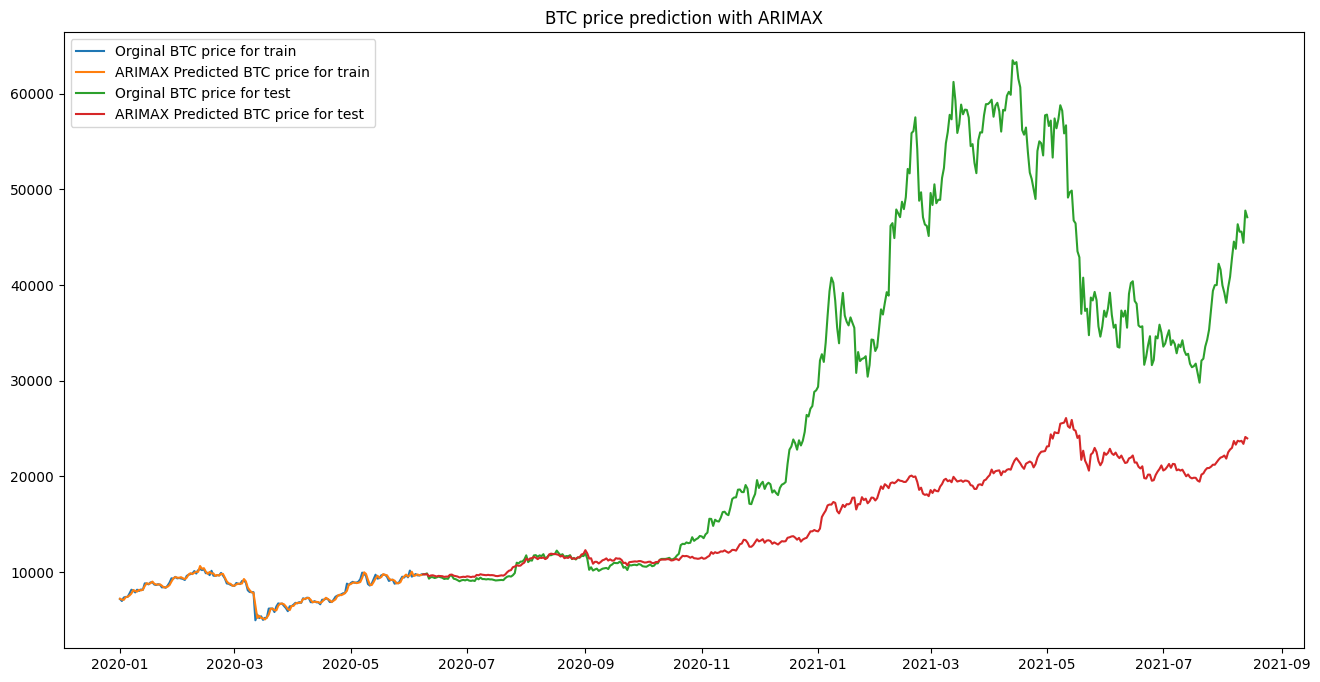

In [55]:
plt.figure(figsize=(16,8))
plt.plot(data_train["BTC"]["2020-01-01":], label="Orginal BTC price for train")
plt.plot(data_train["BTC_predicted_arimax"]["2020-01-01":], label="ARIMAX Predicted BTC price for train")
plt.plot(data_test["BTC"], label="Orginal BTC price for test")
plt.plot(data_test["BTC_predicted_arimax"], label="ARIMAX Predicted BTC price for test")
plt.title("BTC price prediction with ARIMAX")
plt.legend(loc="upper left")
plt.show()

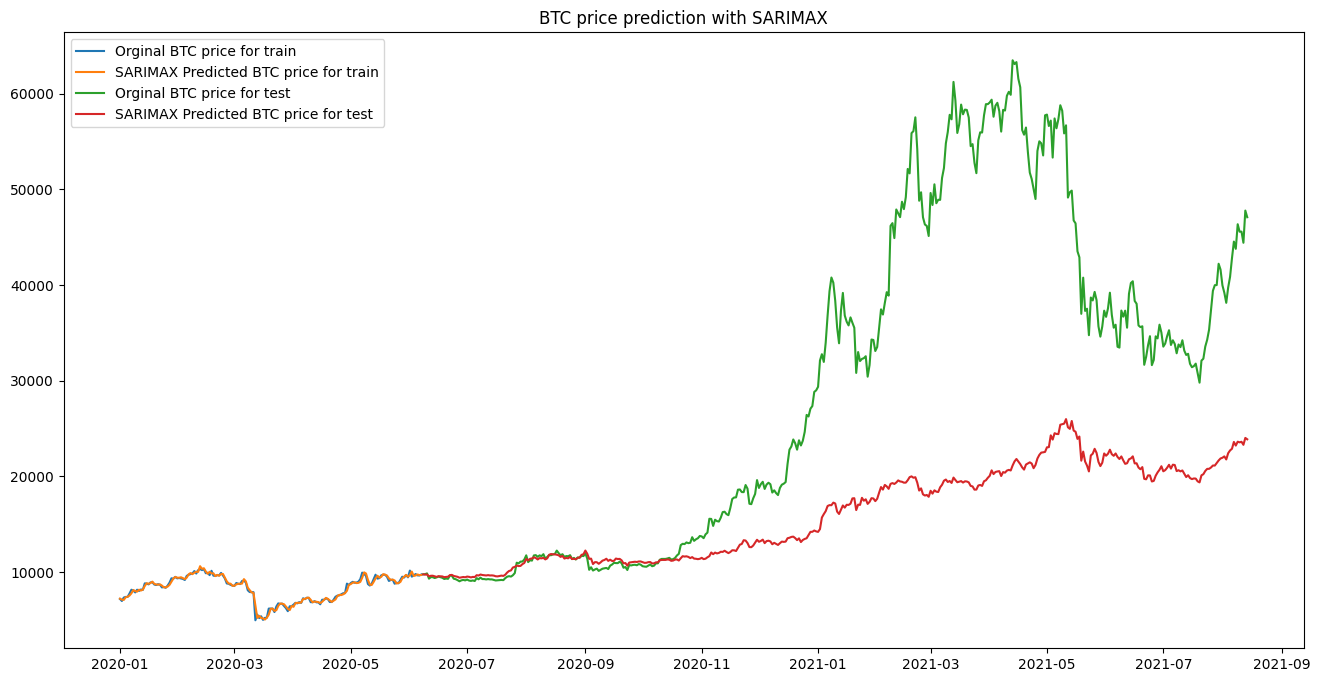

In [56]:
plt.figure(figsize=(16,8))
plt.plot(data_train["BTC"]["2020-01-01":], label="Orginal BTC price for train")
plt.plot(data_train["BTC_predicted_sarimax"]["2020-01-01":], label="SARIMAX Predicted BTC price for train")
plt.plot(data_test["BTC"], label="Orginal BTC price for test")
plt.plot(data_test["BTC_predicted_sarimax"], label="SARIMAX Predicted BTC price for test")
plt.title("BTC price prediction with SARIMAX")
plt.legend(loc="upper left")
plt.show()

In [57]:
def error2(y,pred):
    print("RMSE {}".format(np.sqrt(mean_squared_error(y,pred))))
    print("R2 {}".format(r2_score(y,pred)))
    
print(error2(data_train["BTC"],data_train["BTC_predicted_sarimax"]))
print(error2(data_test["BTC"],data_test["BTC_predicted_sarimax"]))

RMSE 252.21077003631567
R2 0.9959551783983948
None
RMSE 18697.47695314371
R2 -0.16836109378968733
None


In [61]:
!pip install tensorflow

In [62]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
btc=data2[["BTC"]]
btc.head()

,BTC
Date,
2015-09-13,230.511993
2015-09-14,230.643997
2015-09-15,230.304001
2015-09-16,229.091003
2015-09-17,229.809998


In [64]:
datafirst=btc.iloc[:-30]
dataend=btc.iloc[-30:]
dataend

,BTC
Date,
2021-08-15,47047.003906
2021-08-16,46004.484375
2021-08-17,44695.359375
2021-08-18,44801.187500
2021-08-19,46717.578125
2021-08-20,49339.175781
2021-08-21,48905.492188
2021-08-22,49321.652344
2021-08-23,49546.148438


In [65]:
# Standardization

sc=MinMaxScaler(feature_range=(0,1))
data_sc=sc.fit_transform(datafirst)
print(data_sc.shape)

(2163, 1)


In [66]:
# Train - Test Split
train_size=int(len(data_sc)*0.8)
train,test=data_sc[:train_size], data_sc[train_size:]
print(train.shape)
print(test.shape)

(1730, 1)
(433, 1)


In [67]:
# timestep function
def ts(data,timestep):
    x,y=[],[]
    for i in range(timestep,len(data)):
        x.append(data[i-timestep:i,0])
        y.append(data[i,0])
    return np.array(x), np.array(y)

In [70]:

df=pd.DataFrame(columns=["Lag","TrainRMSE","TestRMSE"])

lag=[5,10,15,20]
for i in lag:
    x_train, y_train=ts(train,i)
    x_test, y_test=ts(test,i)
    
    x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], 1) # size edit for LSTM
    x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
    
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    
    model=Sequential()
    
    model.add(LSTM(64, input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1]))
    opt=Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss="mse")
    model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test), verbose=0)
    
    trainpred=model.predict(x_train)
    testpred=model.predict(x_test)
    
    trainpred=sc.inverse_transform(trainpred)
    testpred=sc.inverse_transform(testpred)
    trainY=sc.inverse_transform(y_train)
    testY=sc.inverse_transform(y_test)
    
    rmse_train=np.sqrt(mean_squared_error(trainY, trainpred))
    rmse_test=np.sqrt(mean_squared_error(testY, testpred))
    
    df=df._append({"Lag":i, "TrainRMSE":rmse_train, "TestRMSE":rmse_test}, ignore_index=True)
    
df=df.sort_values(by="TrainRMSE")
df

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step   
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step   
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step   
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step   
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Lag,TrainRMSE,TestRMSE
3,20.0,516.253350,6936.614147
1,10.0,523.481054,5394.700173
2,15.0,523.685158,6996.107111
0,5.0,525.435361,4201.600004


In [69]:
x_train, y_train=ts(train,5)
x_test,y_test=ts(test,5)

# Size editing

x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

model=Sequential()

model.add(LSTM(64, input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

opt=Adam(learning_rate=0.0001) # defaut 0.001
model.compile(optimizer=opt, loss="mse")

history=model.fit(x_train,y_train, epochs=40, validation_data=(x_test,y_test), verbose=0)

trainpred=model.predict(x_train)
testpred=model.predict(x_test)

trainpred=sc.inverse_transform(trainpred)
testpred=sc.inverse_transform(testpred)
trainY=sc.inverse_transform(y_train)
testY=sc.inverse_transform(y_test)

rmse_train=np.sqrt(mean_squared_error(trainY,trainpred))
rmse_test=np.sqrt(mean_squared_error(testY,testpred))

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step   
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


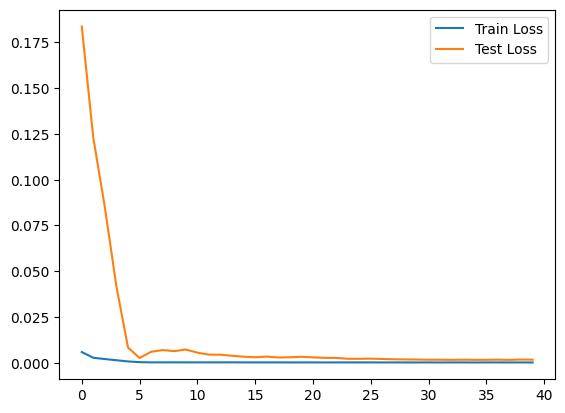

In [72]:
# Let's look at the training and testing losses:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.legend()
plt.show()

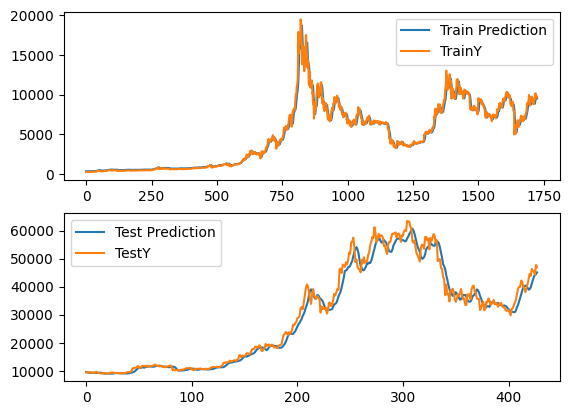

In [74]:
fig, axs = plt.subplots(2,1)
axs[0].plot(trainpred,label="Train Prediction")
axs[0].plot(trainY, label="TrainY")
axs[0].legend()

axs[1].plot(testpred,label="Test Prediction")
axs[1].plot(testY, label="TestY")
axs[1].legend()

plt.show()

In [75]:
sc2=MinMaxScaler(feature_range=(0,1))
data_sc2=sc2.fit_transform(datafirst.iloc[-5:])

pred=model.predict(data_sc2.reshape(1,5,1))
pred=sc2.inverse_transform(pred)

print(dataend)
print("Estimated value as of 2021-08-15: ",pred.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
                     BTC
Date                    
2021-08-15  47047.003906
2021-08-16  46004.484375
2021-08-17  44695.359375
2021-08-18  44801.187500
2021-08-19  46717.578125
2021-08-20  49339.175781
2021-08-21  48905.492188
2021-08-22  49321.652344
2021-08-23  49546.148438
2021-08-24  47706.117188
2021-08-25  48960.789063
2021-08-26  46942.218750
2021-08-27  49058.667969
2021-08-28  48902.402344
2021-08-29  48829.832031
2021-08-30  47054.984375
2021-08-31  47166.687500
2021-09-01  48847.027344
2021-09-02  49327.722656
2021-09-03  50025.375000
2021-09-04  49944.625000
2021-09-05  51753.410156
2021-09-06  52633.535156
2021-09-07  46811.128906
2021-09-08  46091.390625
2021-09-09  46391.421875
2021-09-10  44883.910156
2021-09-11  45201.457031
2021-09-12  46063.269531
2021-09-13  44743.929688
Estimated value as of 2021-08-15:  [45758.484]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

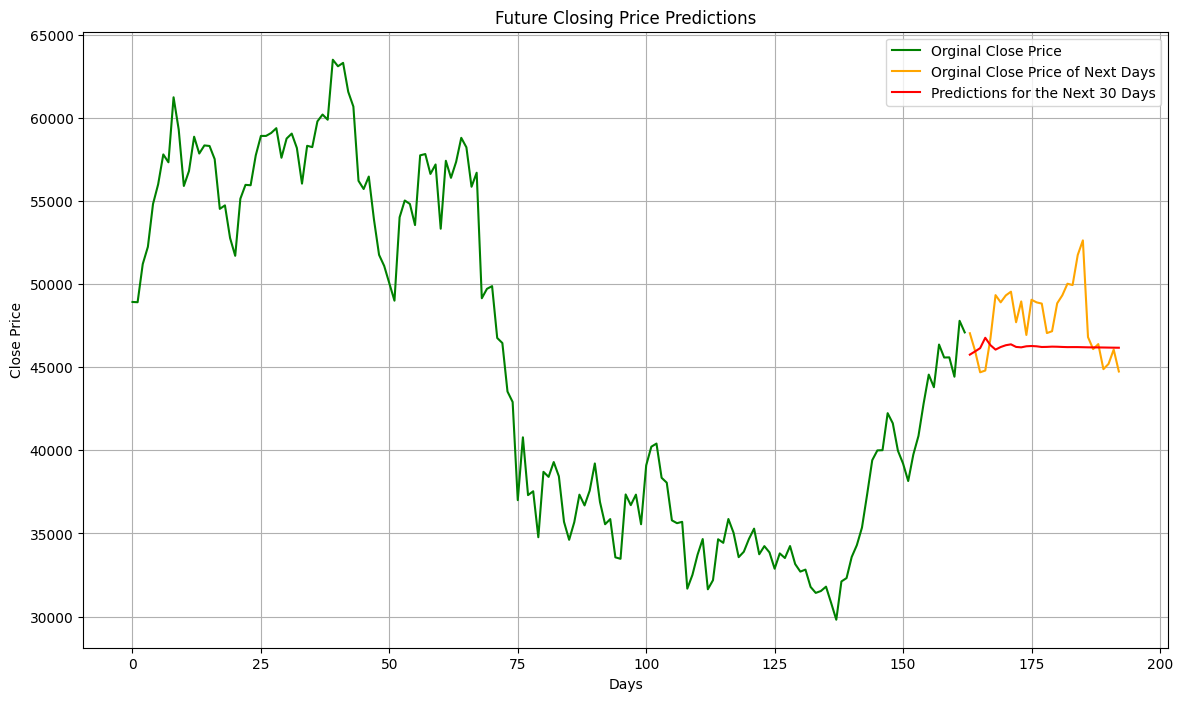

In [76]:
last_5_days=data_sc2.reshape(1,5,1)
future_predictions_scaled = []

for _ in range(30):
    next_day_price=model.predict(last_5_days)
    future_predictions_scaled.append(next_day_price[0,0])
    next_day_price_reshaped=np.array([[next_day_price[0, 0]]]).reshape(1, 1, 1)
    last_5_days = np.append(last_5_days[:, 1:, :], next_day_price_reshaped, axis=1)
    
future_predictions = sc2.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(range(len(datafirst["BTC"][2000:])),datafirst["BTC"].values[2000:],label="Orginal Close Price",color="green")
plt.plot(range(len(datafirst[2000:]), len(datafirst[2000:]) + 30), dataend["BTC"].values,color="orange", label="Orginal Close Price of Next Days")
plt.plot(range(len(datafirst[2000:]), len(datafirst[2000:]) + 30), future_predictions,color="red", label="Predictions for the Next 30 Days")
plt.legend()
plt.grid()
plt.title("Future Closing Price Predictions")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.show()